### **This model test reply threshold**

In [1]:
import pandas as pd
import numpy as np
import warnings

import importlib

#### packages
import helper.strategy_helper as st
import helper.visualization as viz_hp
import config.config as config_hp
import helper.stat_helper as stat_hp

### **Get features**

In [2]:
importlib.reload(stat_hp)

import importlib

importlib.reload(config_hp)

config = config_hp.config()
stat = config['STATS']

final_stat = stat['final_stat']

df_all_stat = pd.read_pickle(final_stat)

### **Converstaion**

In [3]:
config = config_hp.config()
balanced = config['BALANCED']

balanced_pos_conversation = balanced['balanced_pos_conversation']

df_pos = pd.read_pickle(balanced_pos_conversation)

print(df_pos.columns)

balanced_neg_conversation = balanced['balanced_neg_conversation']

df_neg = pd.read_pickle(balanced_neg_conversation)

print(df_neg.columns)

Index(['tweet_text', 'conversation_id', 'replier_tweetid', 'replier_userid',
       'poster_userid', 'poster_tweetid', 'tweet_time', 'tweet_language',
       'replier_label', 'year', 'campaign', 'tweet_label', 'tweet_time_year',
       'common', 'id', 'username'],
      dtype='object')
Index(['tweet_text', 'conversation_id', 'replier_tweetid', 'replier_userid',
       'poster_userid', 'poster_tweetid', 'tweet_time', 'tweet_language',
       'replier_label', 'year', 'campaign', 'tweet_label', 'tweet_time_year',
       'common', 'id', 'username'],
      dtype='object')


#### **Add the poster_userid info in stat data**

In [4]:
df_pos_user = (df_pos.groupby(['poster_userid',
                              'poster_tweetid'
                             ])['replier_tweetid']
               .nunique()
               .to_frame('count')
               .reset_index()
               
              )

df_neg_user = (df_neg.groupby(['poster_userid',
                              'poster_tweetid'
                             ])['replier_tweetid']
               .nunique()
               .to_frame('count')
               .reset_index()
              )

In [5]:
df_all = pd.concat([df_pos_user,
                    df_neg_user
                   ],
                   ignore_index=True
                  )

In [6]:
df_all_stat = df_all_stat.merge(
    df_all[['poster_userid', 'poster_tweetid']],
    on='poster_tweetid',
    how='left'
)

In [7]:
'poster_userid' in df_all_stat.columns

True

### **Prepare necessary data**

In [7]:
df_pos_replier = df_pos.loc[df_pos['replier_label'] == 1]

In [8]:
df_pos_grp = (df_pos_replier
              .groupby(['poster_tweetid'])['replier_tweetid']
              .size()
              .to_frame('positive_replier_count')
              .reset_index()
             )

In [9]:
df_pos_grp.columns

Index(['poster_tweetid', 'positive_replier_count'], dtype='object')

In [11]:
df_all_stat['poster_tweetid'] = df_all_stat['poster_tweetid'].astype(str)
df_pos_grp['poster_tweetid'] = df_pos_grp['poster_tweetid'].astype(str)

In [10]:
df_all_stat = df_all_stat.merge(df_pos_grp,
                  on='poster_tweetid',
                  how='left'
                 )

In [11]:
df_all_stat['positive_replier_count'].fillna(0, inplace=True)

In [12]:
len(df_all_stat)

7816

### **Test with same posters**
Task: See how the reply threshold affect the classification of targeted tweets <br />
Things to be kept constant as the original setting: same poster in both + and - side <br />
balanced dataset

In [13]:
'tweet_label' in df_all_stat.columns

True

In [15]:
list(df_all_stat.columns)

['std_retweet_count',
 'range_reply_count',
 'entropy_num_hashtags',
 'std_num_url',
 'kurtosis_like_count',
 'range_like_count',
 'skew_like_count',
 'skew_reply_count',
 '50%_mention_count',
 'kurtosis_cosine',
 'posted_retweet_count',
 'kurtosis_num_url',
 'skew_retweet_count',
 '75%_num_hashtags',
 '75%_retweet_count',
 'mean_like_count',
 'min_num_hashtags',
 'skew_cosine',
 'mean_cosine',
 'max_num_url',
 'range_num_url',
 '75%_like_count',
 'kurtosis_reply_count',
 '75%_mention_count',
 'min_retweet_count',
 'iqr_reply_count',
 'iqr_num_hashtags',
 'min_reply_count',
 'max_reply_count',
 'std_like_count',
 'mean_reply_count',
 'skew_mention_count',
 'range_diff_min',
 '25%_reply_count',
 'entropy_diff_min',
 'std_num_hashtags',
 'iqr_like_count',
 '50%_num_url',
 'mean_mention_count',
 'skew_num_url',
 '50%_cosine',
 'iqr_retweet_count',
 'kurtosis_diff_min',
 '25%_diff_min',
 'max_diff_min',
 'tweet_label',
 'poster_tweetid',
 '75%_reply_count',
 'min_diff_min',
 'entropy_like_

3866
5  Total length : 7732
5  Total 0 : 3866
5  Total 1:  3866
True

 **** random ****
[1 0]
Xtrain:  6185
Xtrain shape:  (6185, 99)
Xtest:  1547
Ytrain:  6185
Ytest:  1547
Running Random Forest
1.0
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       773
           1       0.79      0.80      0.80       774

    accuracy                           0.80      1547
   macro avg       0.80      0.80      0.80      1547
weighted avg       0.80      0.80      0.80      1547

[[611 162]
 [153 621]]
Cross validation: mean 0.78 f1 with a standard deviation of 0.04
Cross validation: mean 0.8 precision with a standard deviation of 0.02
Cross validation: mean 0.76 recall with a standard deviation of 0.06
Cross validation: mean 0.87 auc with standard deviation of 0.03
                     Importance
Feature                        
entropy_reply_count    0.037050
org_reply_count        0.030578
posted_like_count      0.029757
mean_like_count      

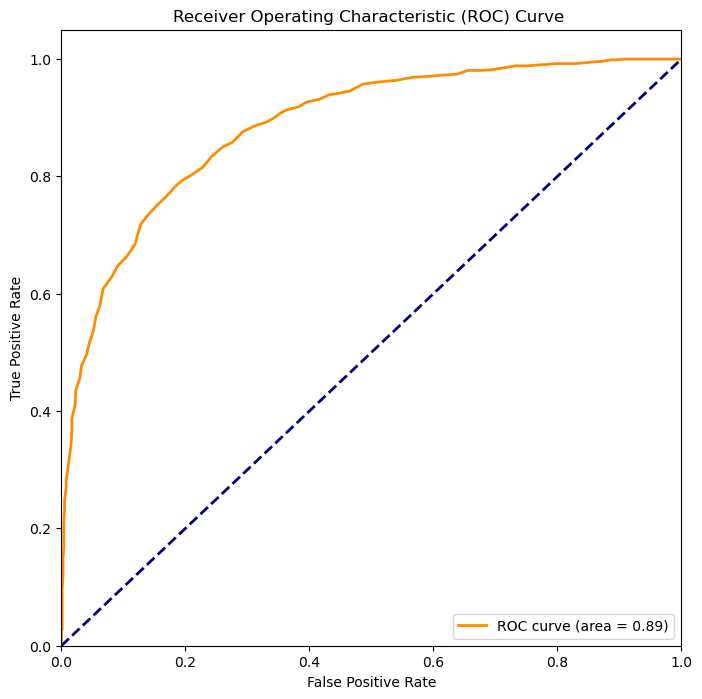

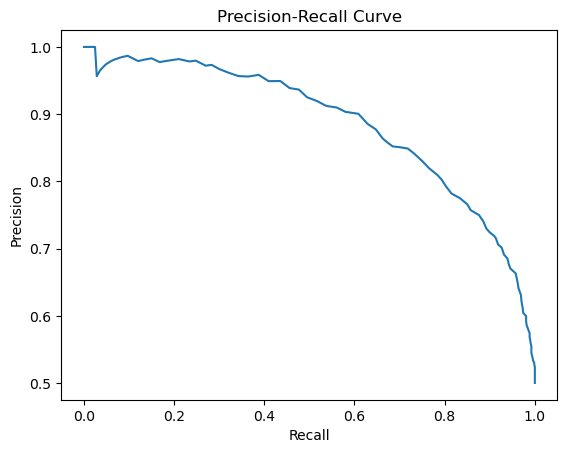

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5]]
2911
6  Total length : 5822
6  Total 0 : 2911
6  Total 1:  2911
True

 **** random ****
[1 0]
Xtrain:  4657
Xtrain shape:  (4657, 99)
Xtest:  1165
Ytrain:  4657
Ytest:  1165
Running Random Forest
1.0
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       582
           1       0.80      0.82      0.81       583

    accuracy                           0.81      1165
   macro avg       0.81      0.81      0.81      1165
weighted avg       0.81      0.81      0.81      1165

[[463 119]
 [104 479]]
Cross validation: mean 0.8 f1 with a standard deviation of 0.03
Cross validation: mean 0.82 precision with a standard deviation of 0.02
Cross validation: mean 0.79 recall with a standard deviation of 0.05
Cross validation: mean 0.89 auc with standard deviation of

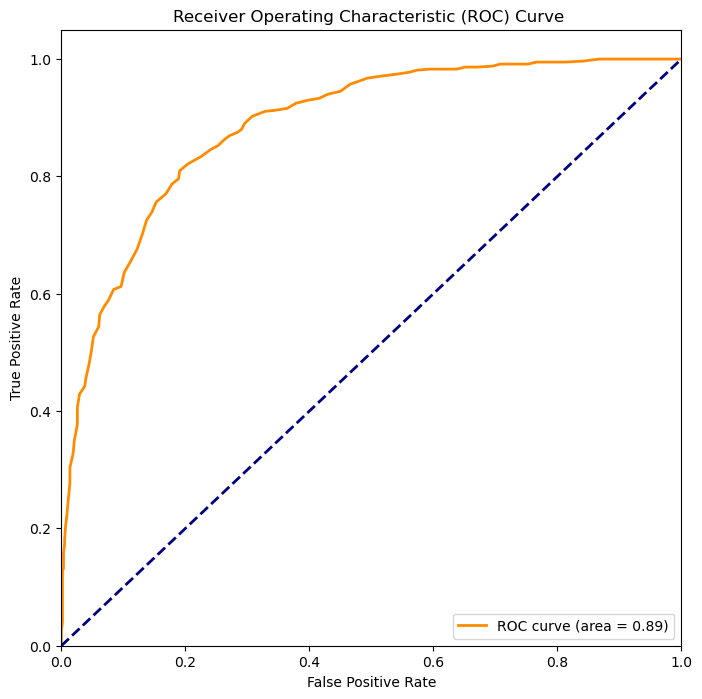

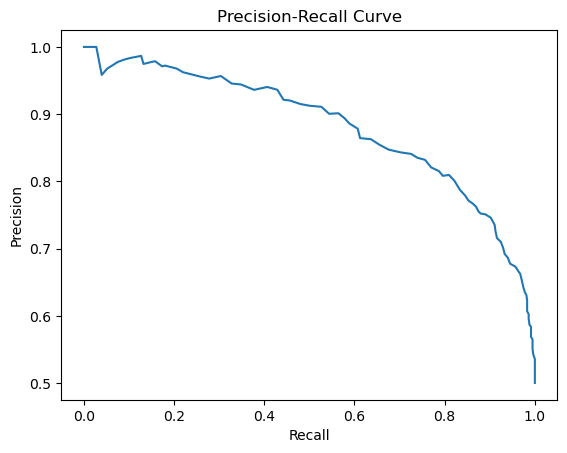

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6]]
2196
7  Total length : 4392
7  Total 0 : 2196
7  Total 1:  2196
True

 **** random ****
[1 0]
Xtrain:  3513
Xtrain shape:  (3513, 99)
Xtest:  879
Ytrain:  3513
Ytest:  879
Running Random Forest
1.0
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       439
           1       0.82      0.86      0.84       440

    accuracy                           0.84       879
   macro avg       0.84      0.84      0.83       879
weighted avg       0.84      0.84      0.83       879

[[355  84]
 [ 61 379]]
Cross validation: mean 0.81 f1 with a standard deviation of 0.03
Cross validation

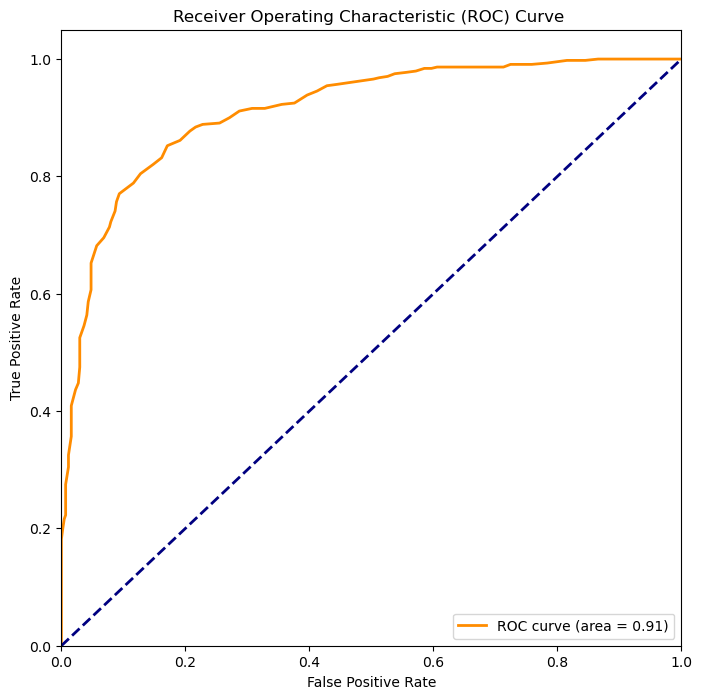

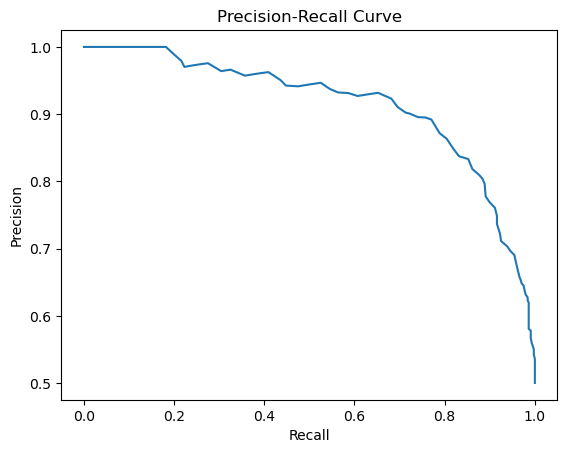

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7]]
1725
8  Total length : 3450
8  Total 0 : 1725
8  Total 1:  1725
True

 **** random ****
[1 0]
Xtrain:  2760
Xtrain shape:  (2760, 99)
Xtest:  690
Ytrain:  2760
Ytest:  690
Running Random Forest
1.0
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       345
           1       0.81      0.80      0.80       345

    accuracy                           0.80       690
   macro avg       0.80    

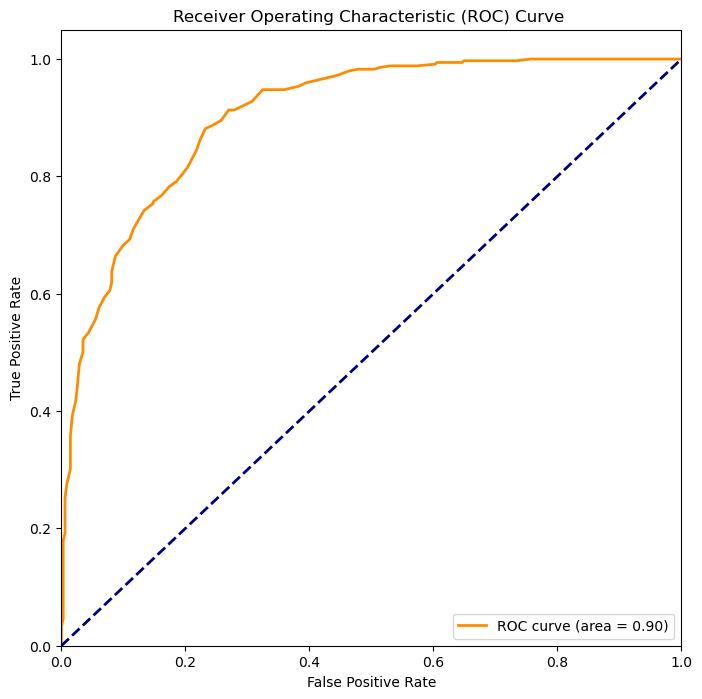

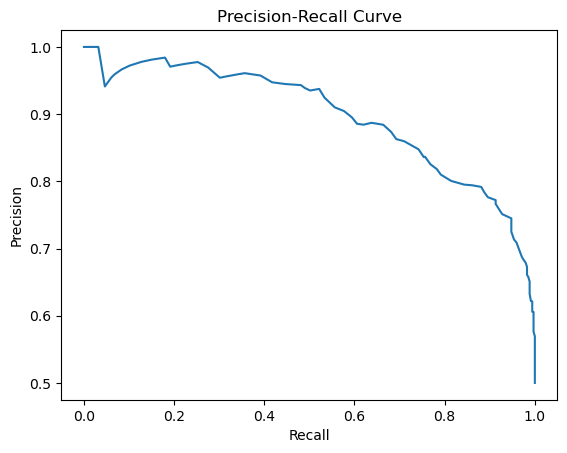

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8]]
1383
9  Total length : 2766
9  Total 0 : 1383
9  Total 1:  1383
True

 **** random ****
[1 0]
Xtrain:  2212
Xtrain shape:  (2212, 99)
Xtest:  554
Ytrain:  2212
Ytest:  554
Running Random Forest
1.0
              precision    recall  f1-score   support

    

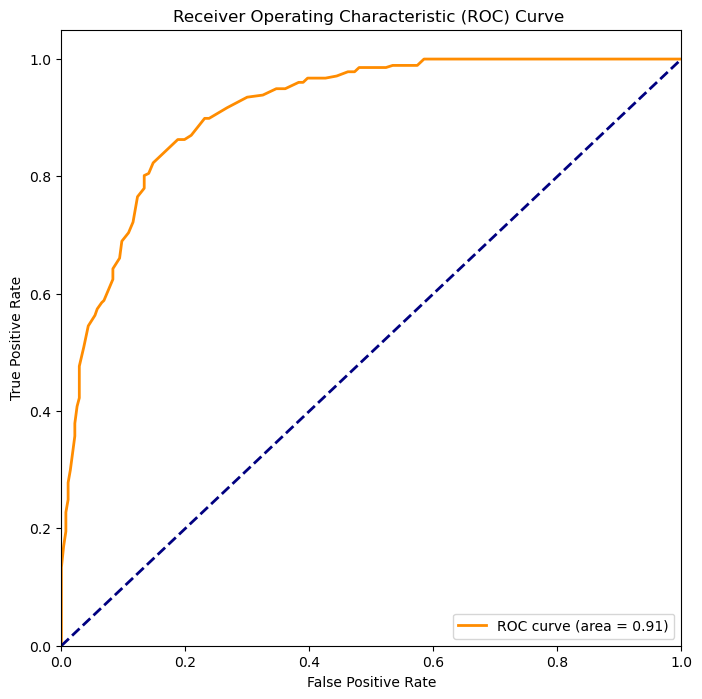

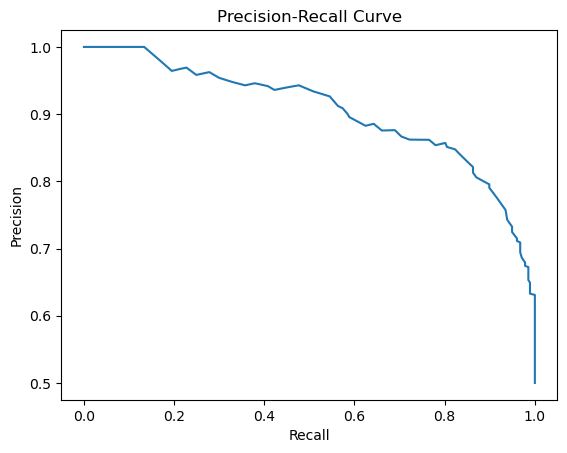

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8], [2766, 0.912373418133952, 0.8424908424908425, 0.8303249097472925, 0.8363636363636365, 0.8327402135231317, 0.8447653429602888, 0.8387096774193549, 0.82, 0.03, 0.82, 0.82, 0.82, 0.9, 9]]
1126
10  Total length : 2252
10  Total 0 : 1126
10  Total 1:  1126
True


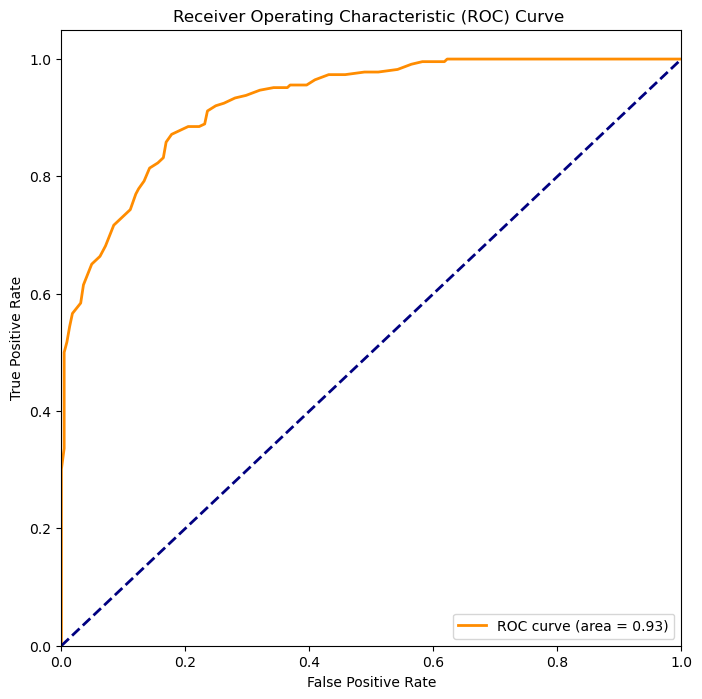

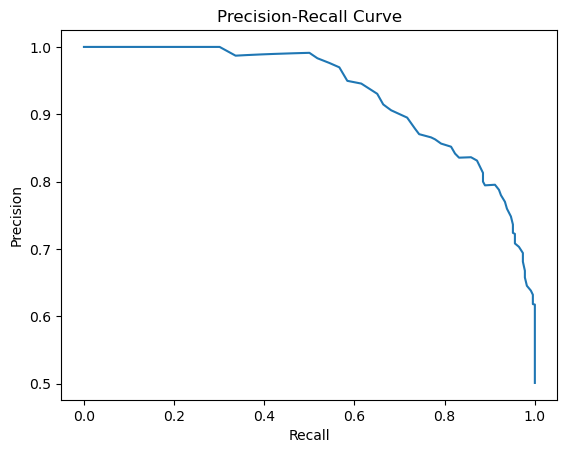

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8], [2766, 0.912373418133952, 0.8424908424908425, 0.8303249097472925, 0.8363636363636365, 0.8327402135231317, 0.8447653429602888, 0.8387096774193549, 0.82, 0.03, 0.82, 0.82, 0.82, 0.9, 9], [2252, 0.9264896755162242, 0.8312236286919831, 0.8716814159292036, 0.850

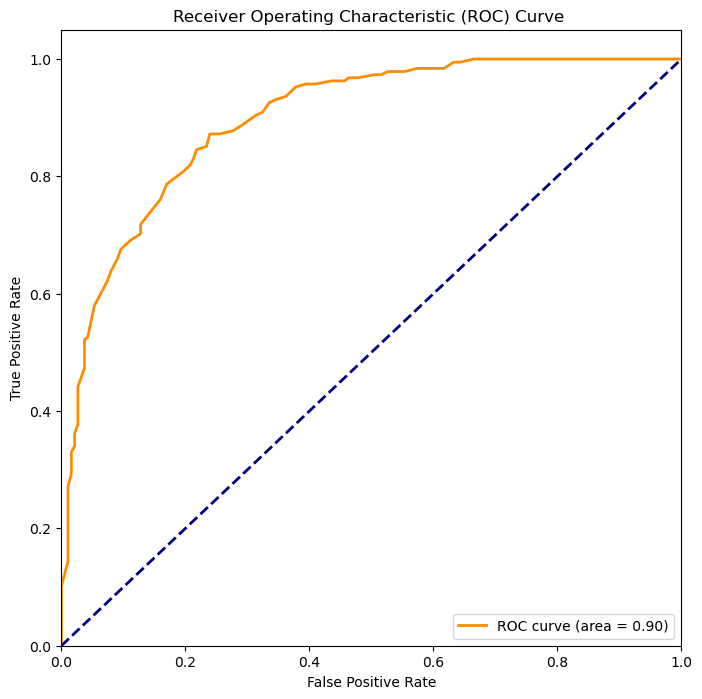

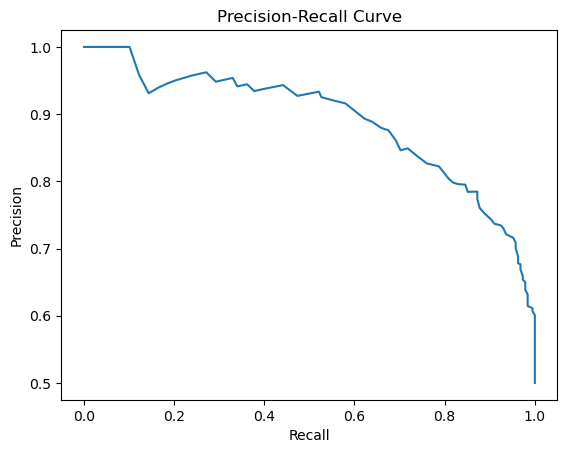

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8], [2766, 0.912373418133952, 0.8424908424908425, 0.8303249097472925, 0.8363636363636365, 0.8327402135231317, 0.8447653429602888, 0.8387096774193549, 0.82, 0.03, 0.82, 0.82, 0.82, 0.9, 9], [2252, 0.9264896755162242, 0.8312236286919831, 0.8716814159292036, 0.850

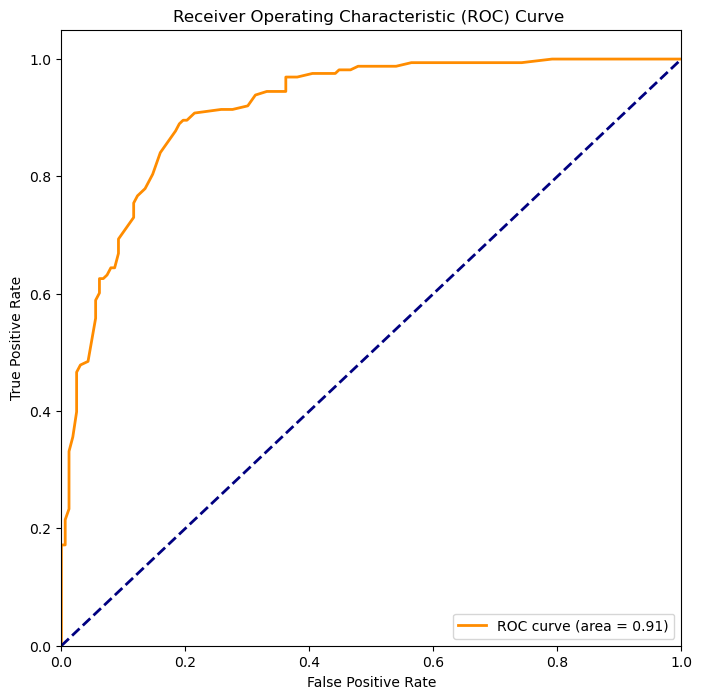

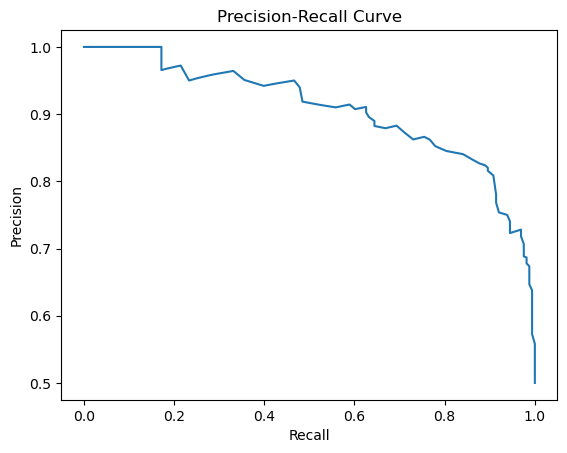

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8], [2766, 0.912373418133952, 0.8424908424908425, 0.8303249097472925, 0.8363636363636365, 0.8327402135231317, 0.8447653429602888, 0.8387096774193549, 0.82, 0.03, 0.82, 0.82, 0.82, 0.9, 9], [2252, 0.9264896755162242, 0.8312236286919831, 0.8716814159292036, 0.850

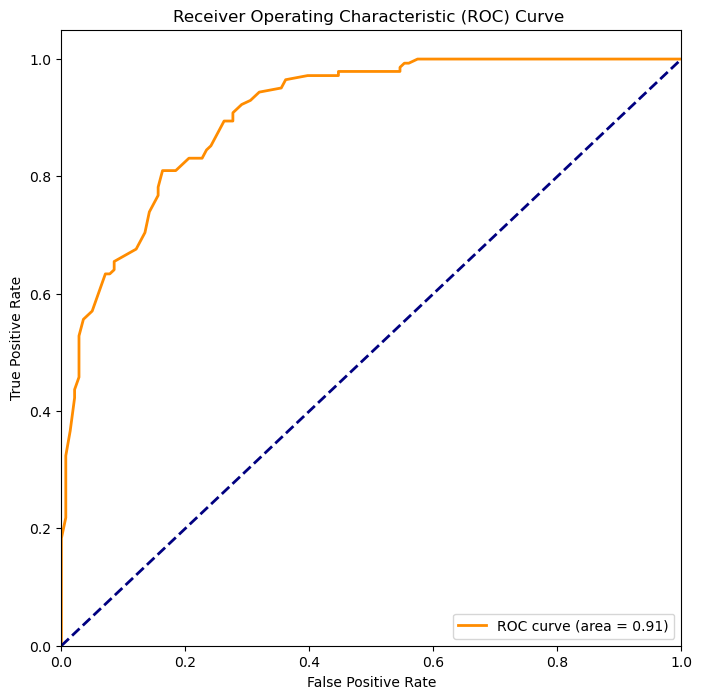

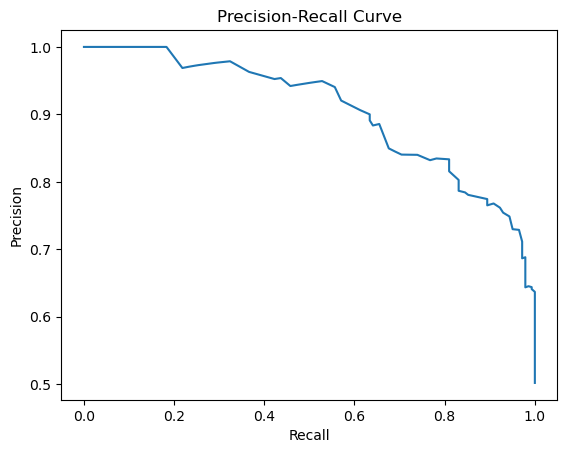

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8], [2766, 0.912373418133952, 0.8424908424908425, 0.8303249097472925, 0.8363636363636365, 0.8327402135231317, 0.8447653429602888, 0.8387096774193549, 0.82, 0.03, 0.82, 0.82, 0.82, 0.9, 9], [2252, 0.9264896755162242, 0.8312236286919831, 0.8716814159292036, 0.850

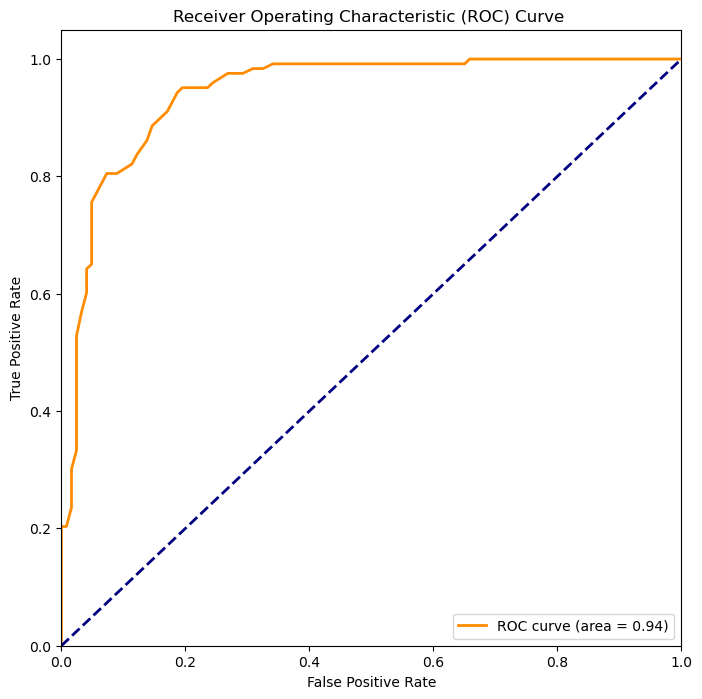

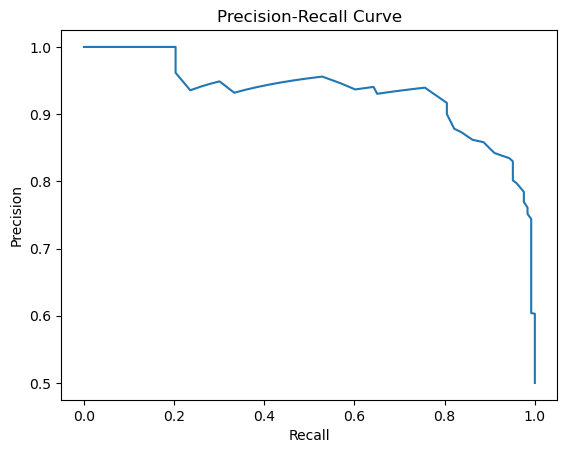

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8], [2766, 0.912373418133952, 0.8424908424908425, 0.8303249097472925, 0.8363636363636365, 0.8327402135231317, 0.8447653429602888, 0.8387096774193549, 0.82, 0.03, 0.82, 0.82, 0.82, 0.9, 9], [2252, 0.9264896755162242, 0.8312236286919831, 0.8716814159292036, 0.850

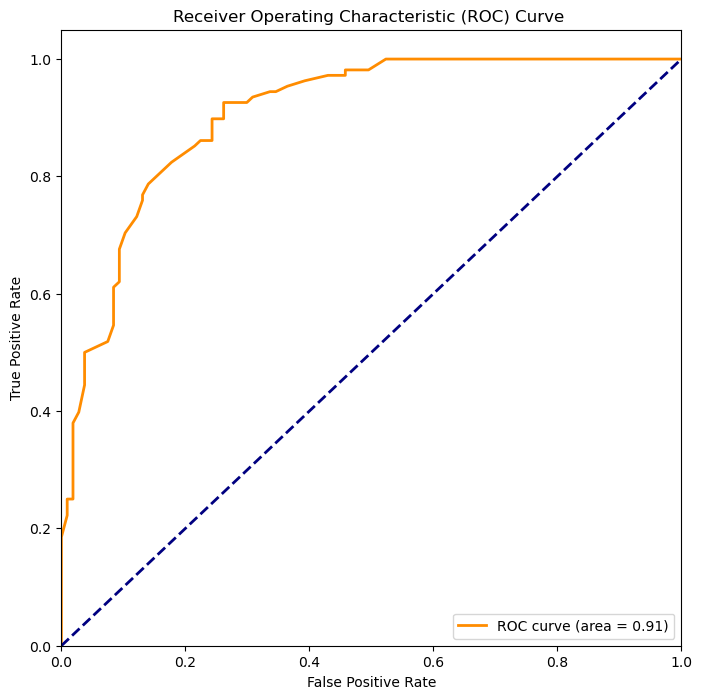

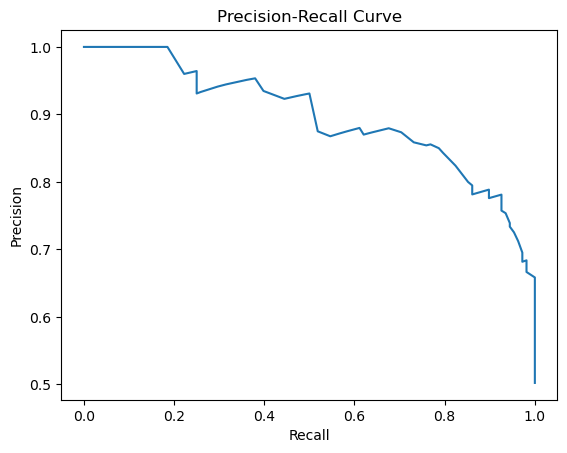

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8], [2766, 0.912373418133952, 0.8424908424908425, 0.8303249097472925, 0.8363636363636365, 0.8327402135231317, 0.8447653429602888, 0.8387096774193549, 0.82, 0.03, 0.82, 0.82, 0.82, 0.9, 9], [2252, 0.9264896755162242, 0.8312236286919831, 0.8716814159292036, 0.850

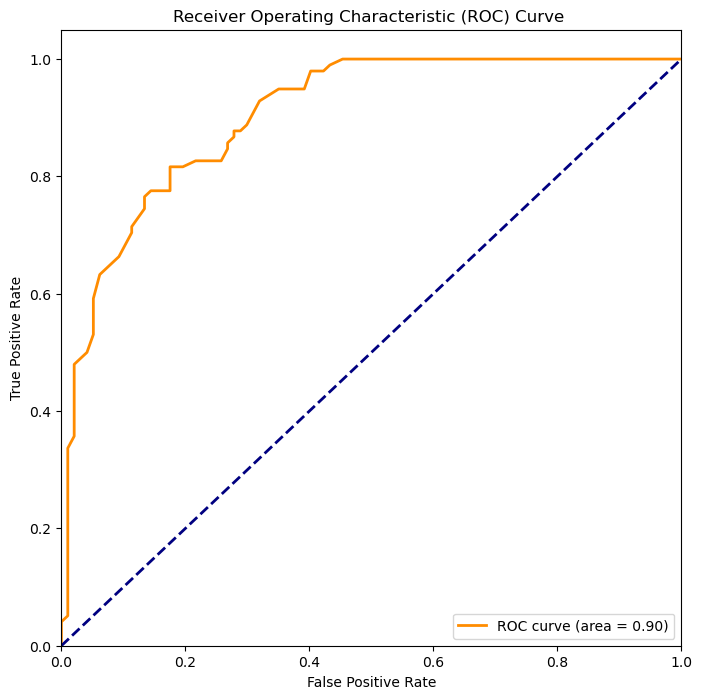

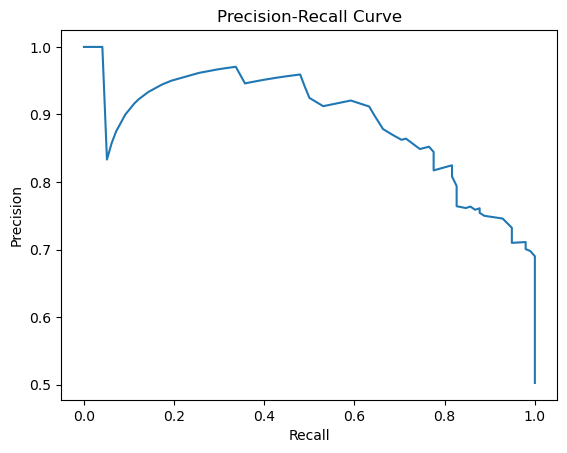

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8], [2766, 0.912373418133952, 0.8424908424908425, 0.8303249097472925, 0.8363636363636365, 0.8327402135231317, 0.8447653429602888, 0.8387096774193549, 0.82, 0.03, 0.82, 0.82, 0.82, 0.9, 9], [2252, 0.9264896755162242, 0.8312236286919831, 0.8716814159292036, 0.850

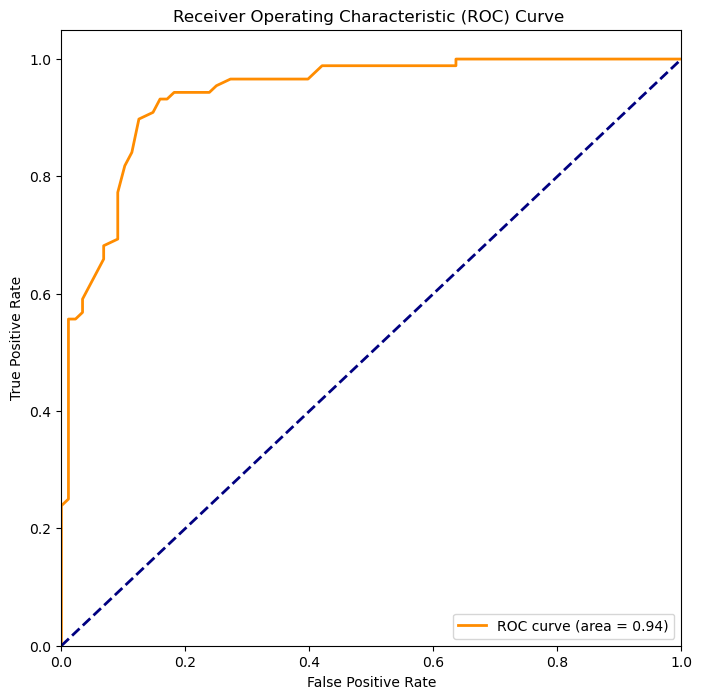

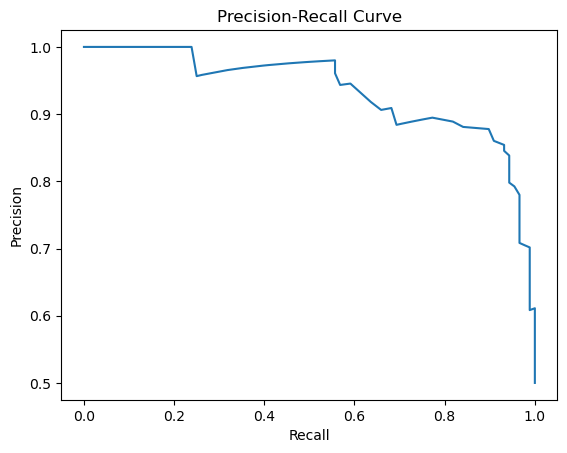

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8], [2766, 0.912373418133952, 0.8424908424908425, 0.8303249097472925, 0.8363636363636365, 0.8327402135231317, 0.8447653429602888, 0.8387096774193549, 0.82, 0.03, 0.82, 0.82, 0.82, 0.9, 9], [2252, 0.9264896755162242, 0.8312236286919831, 0.8716814159292036, 0.850

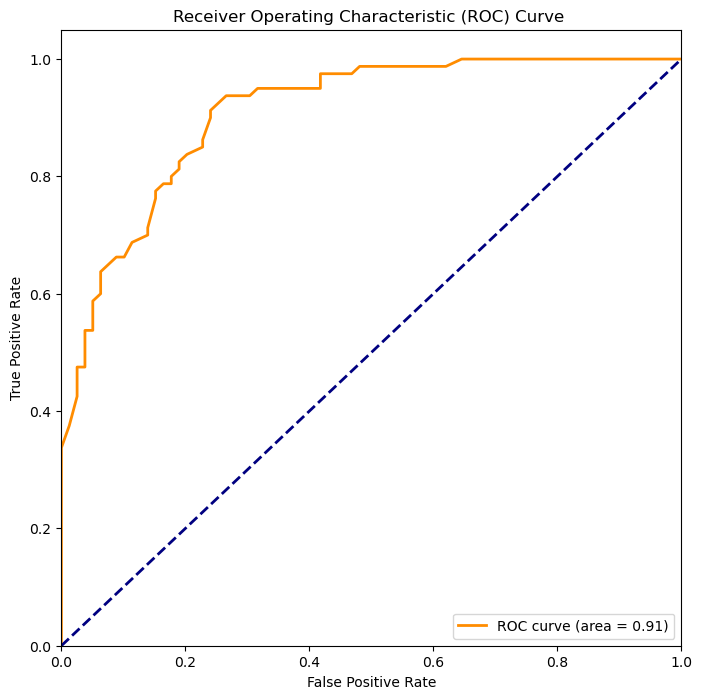

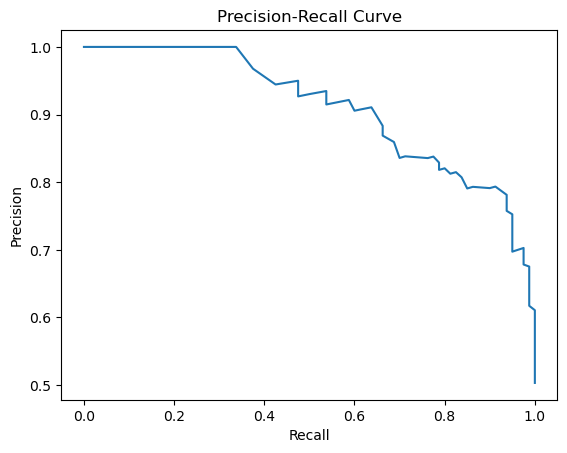

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8], [2766, 0.912373418133952, 0.8424908424908425, 0.8303249097472925, 0.8363636363636365, 0.8327402135231317, 0.8447653429602888, 0.8387096774193549, 0.82, 0.03, 0.82, 0.82, 0.82, 0.9, 9], [2252, 0.9264896755162242, 0.8312236286919831, 0.8716814159292036, 0.850

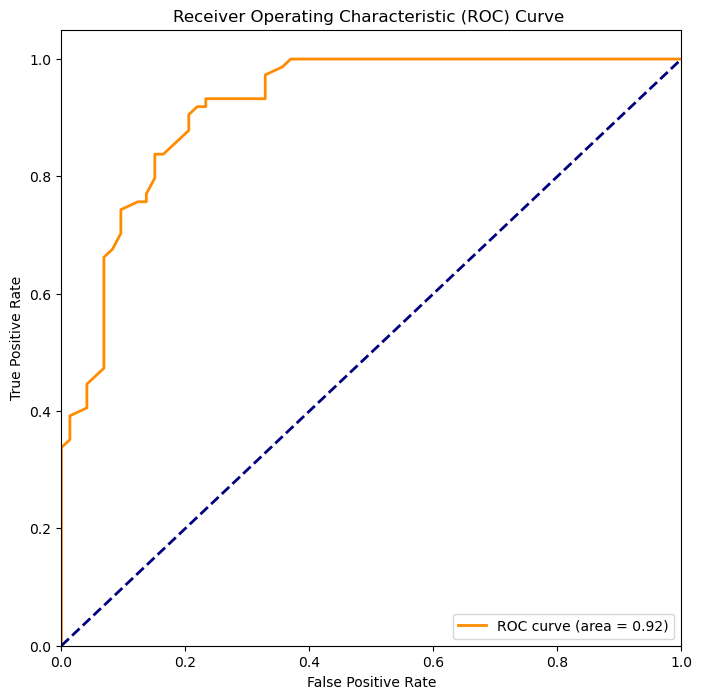

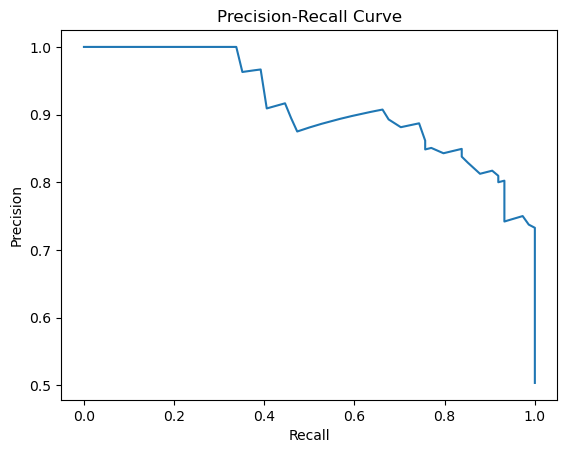

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8], [2766, 0.912373418133952, 0.8424908424908425, 0.8303249097472925, 0.8363636363636365, 0.8327402135231317, 0.8447653429602888, 0.8387096774193549, 0.82, 0.03, 0.82, 0.82, 0.82, 0.9, 9], [2252, 0.9264896755162242, 0.8312236286919831, 0.8716814159292036, 0.850

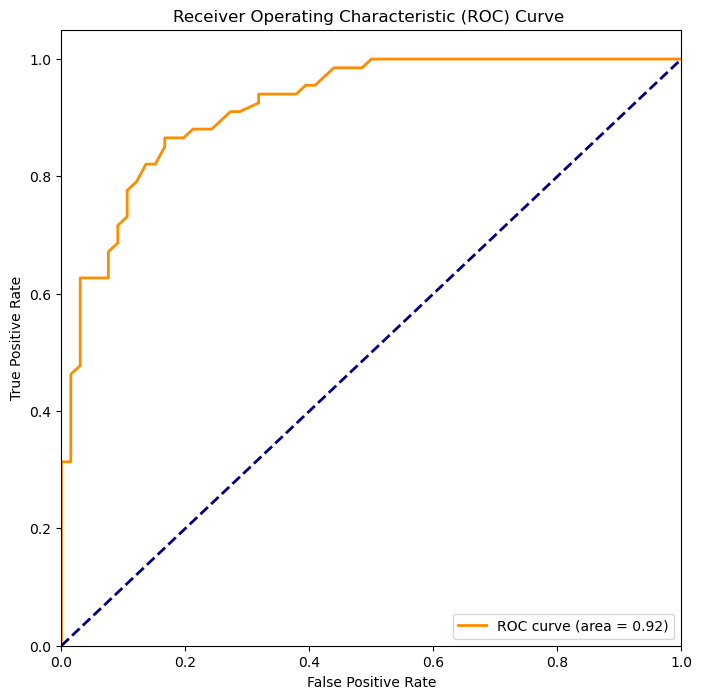

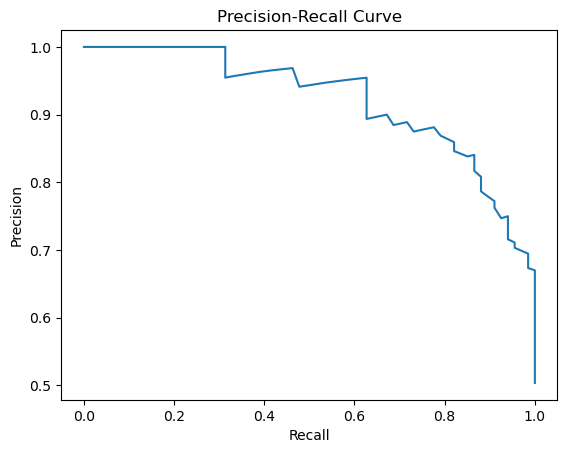

[[7732, 0.8853162784012087, 0.7931034482758621, 0.8023255813953488, 0.7976878612716762, 0.7997382198952879, 0.7904269081500647, 0.7950553025374105, 0.78, 0.04, 0.78, 0.8, 0.76, 0.87, 5], [5822, 0.887065068109612, 0.8010033444816054, 0.8216123499142367, 0.8111769686706182, 0.8165784832451499, 0.7955326460481099, 0.8059181897302002, 0.8, 0.03, 0.8, 0.82, 0.79, 0.89, 6], [4392, 0.9125491820252641, 0.8185745140388769, 0.8613636363636363, 0.8394241417497231, 0.8533653846153846, 0.8086560364464692, 0.8304093567251463, 0.81, 0.03, 0.81, 0.81, 0.81, 0.9, 7], [3450, 0.9048015122873346, 0.8052325581395349, 0.8028985507246377, 0.8040638606676342, 0.8034682080924855, 0.8057971014492754, 0.8046309696092621, 0.81, 0.03, 0.81, 0.8, 0.82, 0.89, 8], [2766, 0.912373418133952, 0.8424908424908425, 0.8303249097472925, 0.8363636363636365, 0.8327402135231317, 0.8447653429602888, 0.8387096774193549, 0.82, 0.03, 0.82, 0.82, 0.82, 0.9, 9], [2252, 0.9264896755162242, 0.8312236286919831, 0.8716814159292036, 0.850

In [17]:
all_result = []
for i in range(5, 21):
    #postivie dataset
    df_1 = df_all_stat.loc[(df_all_stat['positive_replier_count'] >= i)]
    
    total_flag1 = len(df_1)
    
    print(total_flag1)
    
    #negative dataset
    #maintain the same poster
    df_neg_data = df_all_stat.loc[
        df_all_stat['tweet_label'] == 0
    ]
    df_0_all = df_neg_data.loc[
        df_neg_data['poster_userid'].isin(df_1['poster_userid'])
    ]
    
    ## Maintain the balanced dataset
    df_0 = df_0_all.sample(n=total_flag1, 
                       random_state=42)
    
    df_sample = pd.concat([df_1, df_0],
                          ignore_index=True
                         )
    
    total_len = len(df_sample)
    
    print(i, ' Total length :', total_len)
    print(i, ' Total 0 :', len(df_0))
    print(i, ' Total 1: ', len(df_1))
    
    print('tweet_label' in df_all_stat.columns)
    
    model, df_return, roc, prf_1, prf_0, mean_score, std_score, final_score = \
    stat_hp.run_model(df_sample,
                      columns_not_include=['positive_replier_count', 
                                           'poster_userid'],
                      model_type='random', 
                      pca=False,
                      y_column = 'tweet_label',
                      filename=None,
                      find_threshold=False
                     )
    
    all_result.append([total_len, roc, prf_1[0], 
                       prf_1[1], prf_1[2],
                       prf_0[0], prf_0[1], prf_0[2],
                       mean_score, std_score,
                       final_score['mean_f1'], 
                       final_score['mean_precision'],
                       final_score['mean_recall'],
                       final_score['mean_auc'],
                       i
                      ])
    print(all_result)
        
(pd.DataFrame(data=all_result,
              columns=['total_data',
                       'roc', 'precision_1', 'recall_1',
                       'f1_1', 'precision_0', 'recall_0',
                       'f1_0', 'mean_f1', 'std_f1', 
                       'mean_f1_CV', 'mean_precision_CV',
                       'mean_recall_CV',
                       'mean_auc_CV',
                       'threshold'
                      ]
             )
 
).to_pickle('./data/reply_threshold_same_poster.pkl.gz')

### **Plot result**

In [18]:
importlib.reload(viz_hp)

<module 'helper.visualization' from '/N/slate/potem/project/infoOps-strategy/package/helper/visualization.py'>

In [19]:
df_result = pd.read_pickle(
    './data/reply_threshold_same_poster.pkl.gz'
)

In [20]:
df_result.columns

Index(['total_data', 'roc', 'precision_1', 'recall_1', 'f1_1', 'precision_0',
       'recall_0', 'f1_0', 'mean_f1', 'std_f1', 'mean_f1_CV',
       'mean_precision_CV', 'mean_recall_CV', 'mean_auc_CV', 'threshold'],
      dtype='object')

./plots/reply_threshold_same_poster.png
./plots/reply_threshold_same_poster.png


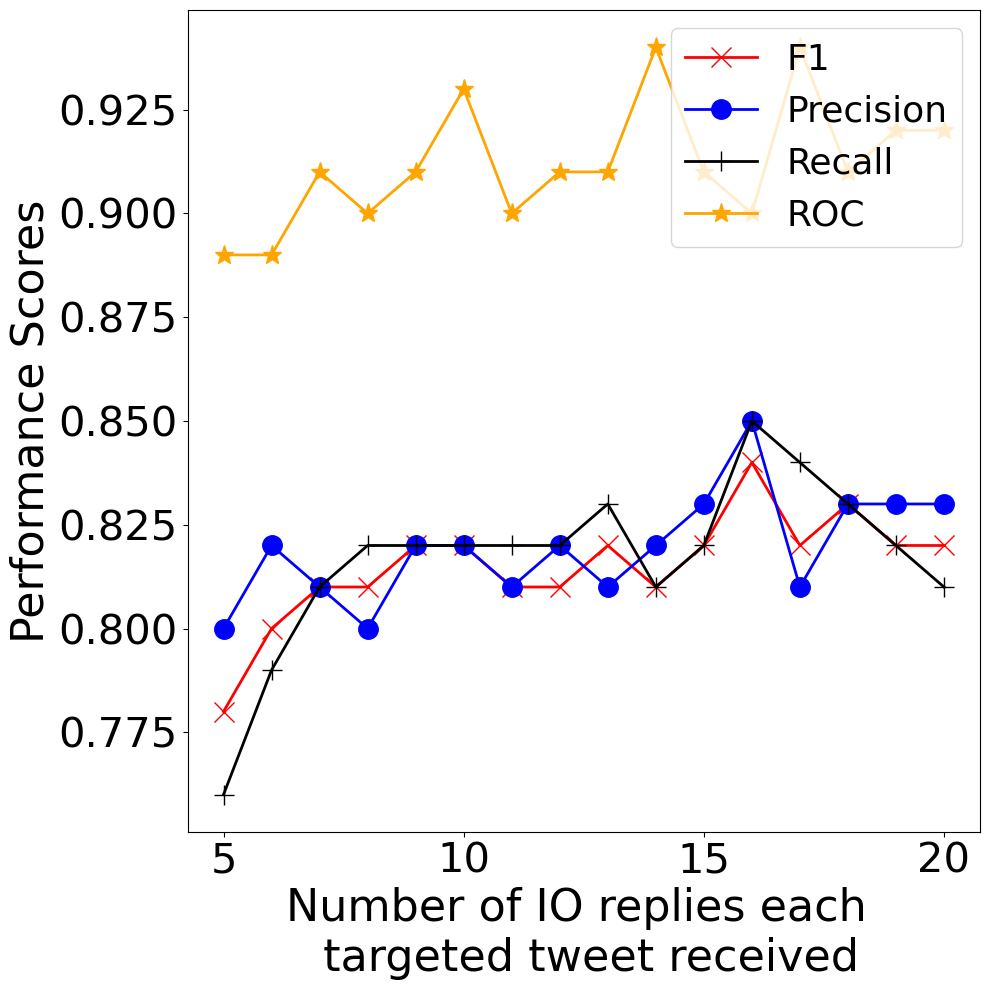

In [23]:
importlib.reload(viz_hp)

df_result = df_result.sort_values(by=['threshold'],
                                  ascending=True
                                 )
df_result = round(df_result, 2)

parameters = {
        'data': df_result,
        'size': (10, 10),
        'fontsize': 30,
        'tick_size': 28,
        'legend_font': 26,
        'legend_size': 26,
        'complementary': False,
        'columns': [
            {'column': 'mean_f1_CV',
             'label': 'F1',
            },
            {
            'column': 'mean_precision_CV',
             'label': 'Precision'
            },
            {
                'column': 'mean_recall_CV',
                'label': 'Recall',
            },
            {'column': 'roc',
             'label': 'ROC',
            }
        ],
        'x': 'threshold',
        # 'x_ticks': 'label',
        'xlabel': 'Number of IO replies each \n targeted tweet received',
        'ylabel': 'Performance Scores',
        'legend_location': 'upper right',
        # 'legend_lower': True,
        'log_yscale': False,
        'log_xscale': False,
        'save': {
            'path': './plots',
            'filename': 'reply_threshold_same_poster.png'
        },
        'random_color': False
    }
    

viz_hp.line_plot(parameters)